# Deconvelution

lets see what we get

In [26]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

# Ensure the plots are displayed inline within the Jupyter notebook (if you are using one)
%matplotlib inline

# Load the data from the CSV file into a Pandas DataFrame
# Make sure to replace "~/AllSamplesCellFractionsAveraged10SM.csv" with the correct file path if needed, the data is available on github with the same name
data2 = pd.read_csv("~/AllSamplesCellFractionsAveraged10SM.csv")

# Display the first few rows of the DataFrame to check if the data is loaded correctly
data2.head()


,Trial,Mixture,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,...,Myeloids,BCells,CAFs,PVLs,Endothelials,ER,PAM50,Response,RoRScore,RoRRisk
2002,GSE18728,GSM465239,0.008275,0.000000,0.000135,0.296028,0.026942,0.0,0.034145,0.002189,...,0.238498,0.008275,0.296163,0.013926,0.075800,Negative,Her2,RD,0.970938,High
2003,GSE18728,GSM465240,0.007134,0.003738,0.000000,0.253386,0.023796,0.0,0.027218,0.004886,...,0.139479,0.010872,0.253386,0.012260,0.058504,Negative,Basal,RD,0.886103,High
2004,GSE18728,GSM465241,0.016420,0.000000,0.000000,0.299213,0.027612,0.0,0.030095,0.004889,...,0.158057,0.016420,0.299213,0.009607,0.059761,Negative,Basal,RD,0.854882,High
2005,GSE18728,GSM465242,0.016109,0.000000,0.000000,0.157259,0.053069,0.0,0.014182,0.002780,...,0.252804,0.016109,0.157259,0.005191,0.056082,Negative,Basal,pCR,0.959998,High
2006,GSE18728,GSM465243,0.009995,0.000043,0.000000,0.129013,0.040297,0.0,0.013085,0.003691,...,0.152608,0.010038,0.129013,0.005914,0.039326,Negative,Basal,pCR,1.000000,High


In [27]:
# Assigning the variable 'data2' to another variable 'data'
data = data2

# Mapping the values in the 'Response' column to binary values 0 and 1
resp = {'pCR': 1, 'RD': 0}
data.Response = [resp[item] for item in data.Response]

# Mapping the values in the 'ER' column to binary values 0 and 1
er = {'Positive': 1, 'Negative': 0}
data.ER = [er[item] for item in data.ER]

# Selecting Her2 subtype
data= data.loc[data['PAM50'] == 'LumA'] 

# Selecting validation  cohort data
data = data[data['Trial'].isin(['GSE25066', 'GSE32603', 'GSE32646', 'GSE37946', 'GSE50948', 'GSE23988'])]

# Saving the modified data to a CSV file named 'DiscoveryData.csv' which is available on github with the same name
data.to_csv('~/PAM50/LumA/ValidationData.csv')

# Printing the shape (number of rows and columns) of the final 'data' DataFrame
print(data.shape)

C:\Users\Youness\AppData\Local\Temp\ipykernel_3288\121969241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Response = [resp[item] for item in data.Response]
C:\Users\Youness\AppData\Local\Temp\ipykernel_3288\121969241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ER = [er[item] for item in data.ER]


(300, 43)

# Preprocessing 

In [28]:
# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn import preprocessing

 
# Extract the features (independent variables) and create a DataFrame 'X'
# Drop the columns 'Trial', 'Mixture', 'Response', and 'Cohort' from the data to get the features
X = pd.DataFrame(data.drop(['Trial', 'Mixture', 'Response','PAM50', 'Cohort'], axis=1))

# Create a copy of 'X' in DataFrame 'd3' (later to be used in SHAP analysis)
d3 = pd.DataFrame(data.drop(['Trial', 'Mixture', 'Response','PAM50', 'Cohort'], axis=1))

# Extract the target variable 'y' (dependent variable) from the 'data' DataFrame
y = data['Response']

# Perform standardization on the features using the StandardScaler from sklearn
# This step scales the features to have mean 0 and standard deviation 1
# This is important for some machine learning algorithms that are sensitive to feature scales
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns=d3.columns)

# Print the shape of the 'X' DataFrame (number of rows and columns)
print("Shape of X:", X.shape)


,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,GenMod1,...,T.cells.CD8.,Cancer.Cells,Normal.Epi,TCells,Myeloids,BCells,CAFs,PVLs,Endothelials,ER
0,1.231881,-0.312107,1.230474,-0.353000,0.347937,-0.230208,3.810277,1.047188,2.399707,-0.403023,...,-0.303244,-1.276504,0.526039,-0.074063,-0.729011,0.612446,0.027380,0.333476,3.660796,0.351562
1,1.297721,-0.635360,1.206219,-0.166320,0.084663,-0.010626,0.943352,0.195065,0.718728,0.351358,...,0.106696,-0.370303,0.034422,0.166062,-0.623098,0.383676,0.208212,-0.111186,0.978447,0.351562
2,0.153925,-0.502241,-0.225450,-0.135874,0.787947,-0.116844,-0.621059,-0.232254,1.082285,1.012695,...,-0.226799,0.125231,0.390020,-0.237637,-0.344366,-0.318615,-0.207410,-0.445086,0.306439,0.351562
3,0.970453,-0.435116,0.762660,0.093196,0.587780,-0.278788,-0.204724,0.690224,1.489782,0.825855,...,0.084591,-0.323869,-0.407511,-0.069550,-0.178509,0.321051,0.331823,0.349697,1.024106,0.351562
4,1.012487,-0.699081,0.215106,0.265410,0.126269,-0.278788,-0.299975,-0.494013,1.638538,1.162457,...,-0.218327,0.292701,-0.362676,-0.969441,-0.415821,0.125874,0.334910,-0.451952,0.700036,0.351562


#  Test Train

In [29]:
#   Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Split into training/testing datasets using Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3333,random_state=10)#
 
print ('Train set:', X_train.shape,y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set: (200, 37) (200,)
Test set:  (100, 37) (100,)


# Support Vector Machine

In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(C=1,gamma=0.024,kernel='rbf',probability=True, class_weight='balanced')  # 

cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = clf #svm.SVC(C=1,kernel='linear',probability=True) 
Acc_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
f1_score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(Acc_score)*100, std(Acc_score)*100))
print('f1 score: %.3f (%.3f)' % (mean(f1_score), std(f1_score)))

Accuracy: 86.000 (5.637)
f1 score: 0.306 (0.146)


In [31]:
X_train, y_train = X,y 
X_test, y_test = X,y
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = svm.SVC(C=1,gamma=0.024,kernel='rbf',probability=True, class_weight='balanced')  # 

clf.fit(X_train,y_train)

yhatSVM = clf.predict(X_test)

svmaccu = accuracy_score(y_test, yhatSVM)
svmf1 = f1_score (y_test, yhatSVM)
print("Support Vector Machines are ", svmaccu*100, "accurate")
print("SVM  f1 score is", svmf1)

Support Vector Machines are  94.0 accurate
SVM  f1 score is 0.6896551724137931


 # SHAP Analysis

In [32]:
!pip install shap
import shap


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Youness\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
clf.fit(X,y)


svm_explainer = shap.KernelExplainer(clf.predict,X)
svm_shap_values = svm_explainer.shap_values(X_test)

X does not have valid feature names, but SVC was fitted with feature names
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/300 [00:00<?, ?it/s]X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set p

In [34]:
svm_shap= pd.DataFrame(svm_shap_values,columns=d3.columns)
svm_shap.to_csv('D:/Dropbox (UiO)/Validation/0Code/PAM50/LumA/SHAP SHalf.csv') 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


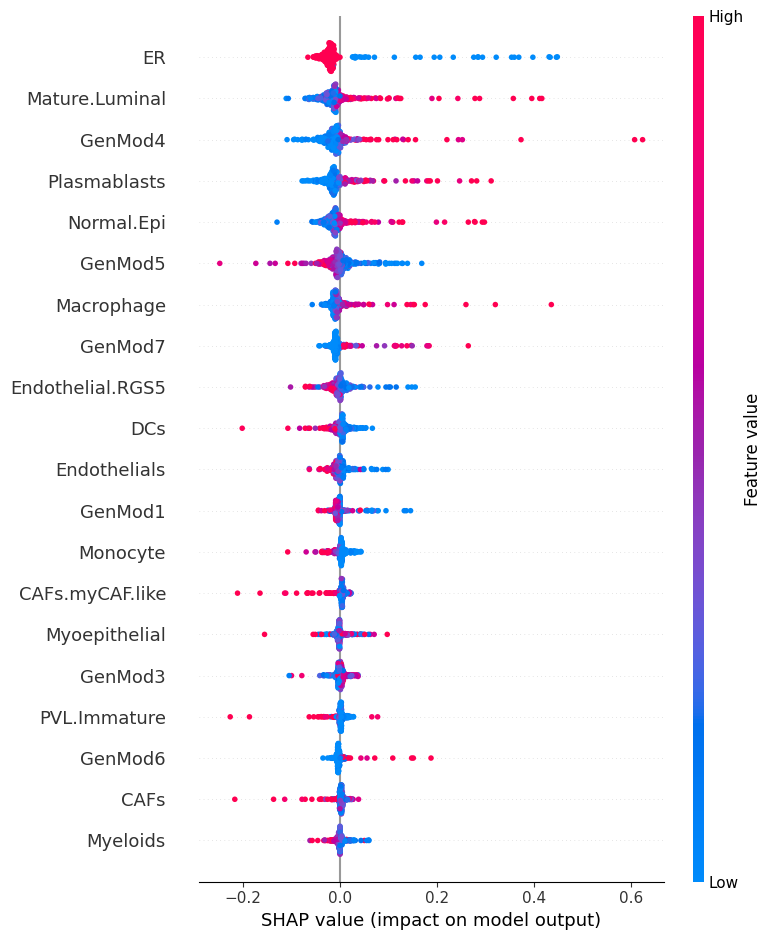

In [35]:
shap.summary_plot(svm_shap_values, X_test,feature_names=d3.columns)

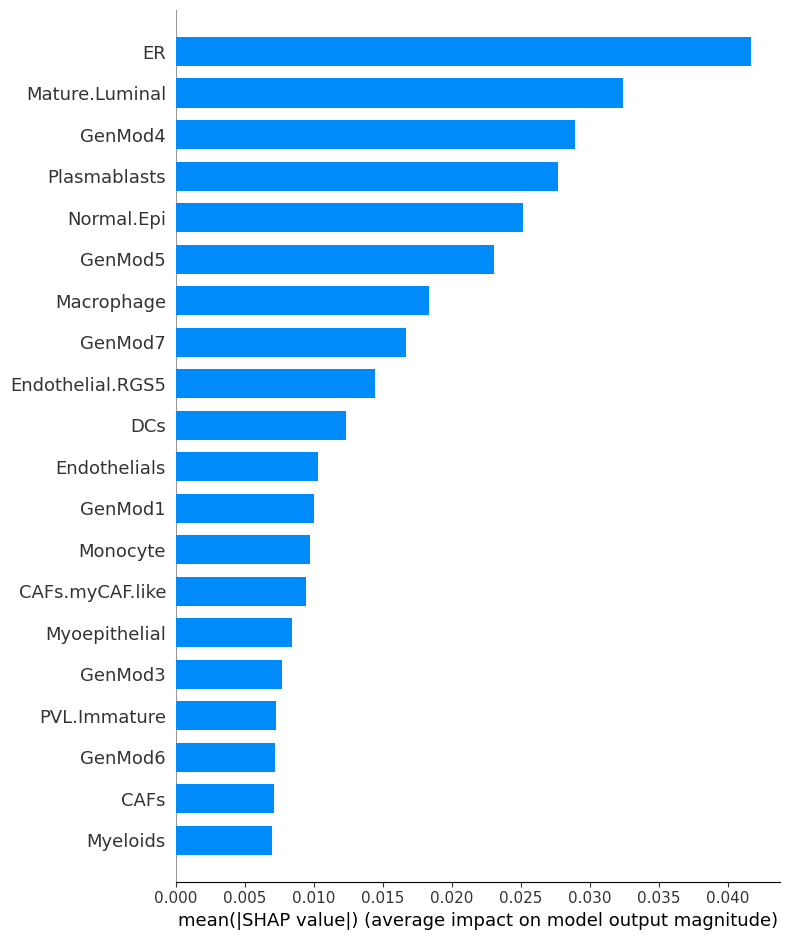

In [36]:
shap.summary_plot(svm_shap_values, X_test, feature_names=d3.columns, plot_type="bar")

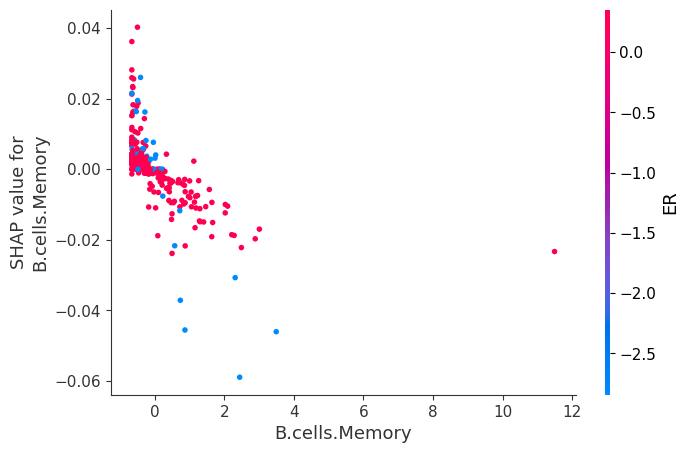

In [37]:
shap.dependence_plot(0, svm_shap_values,X_test, feature_names=d3.columns)